In [3]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

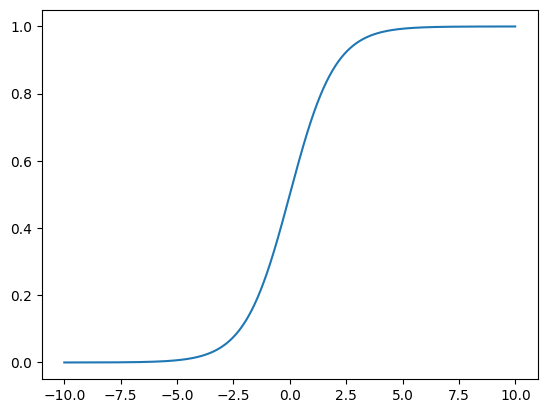

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(z, g);
# sigmoid

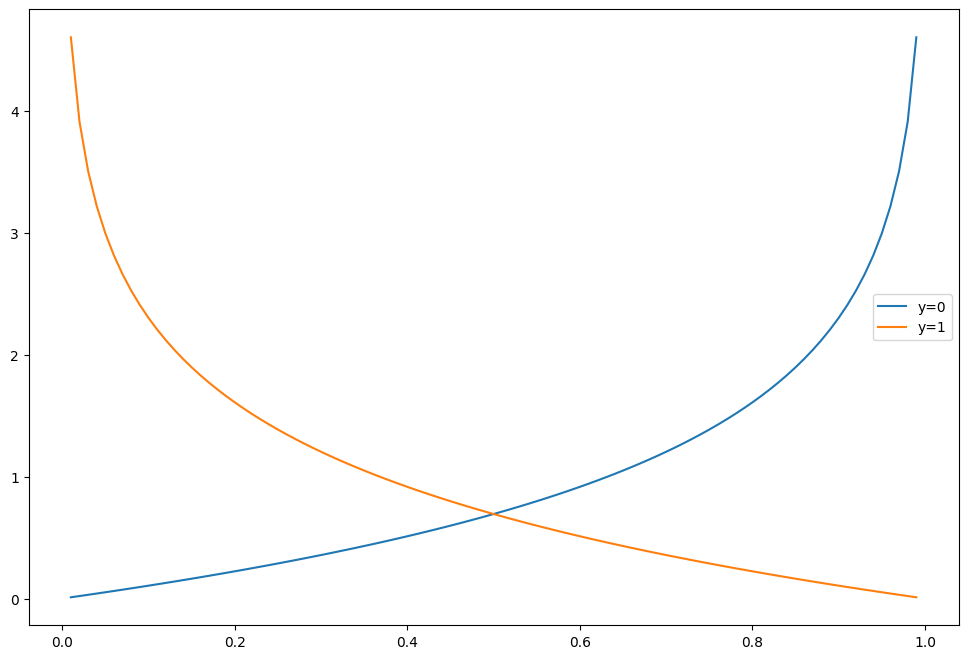

In [8]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')
plt.legend()

plt.show()

# cross entropy

In [9]:
import numpy as np

X = np.array([[1., 1.],  [1., 2.], [2., 1.],
              [3., 2.], [3., 3.], [2., 3.]], dtype=np.float32)

y = np.array([[0.], [0.], [0.], [1.], [1.], [1.]], dtype=np.float32)

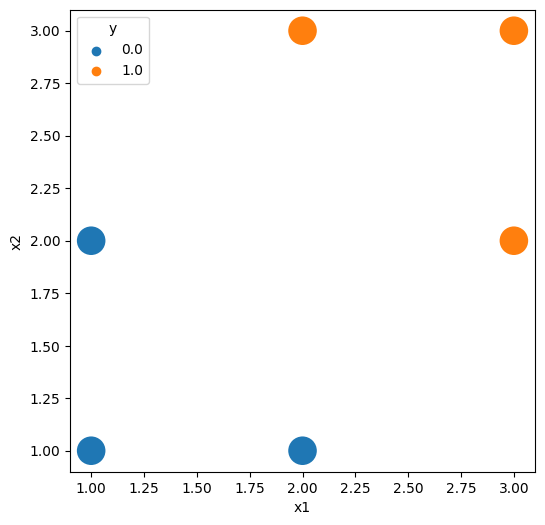

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(6,6))
sns.scatterplot(x='x1', y='x2', hue='y', data=df, s=500)
plt.show()

In [11]:
import tensorflow as tf

W = tf.Variable(tf.random.normal([2, 1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

print("Initial Weight : ", W.numpy())
print("Initial Bias : ", b.numpy())

Initial Weight :  [[-0.14852417]
 [ 2.0698242 ]]
Initial Bias :  [-1.1481161]


In [13]:
def logistic_reg_output(X):
    z = tf.matmul(X, W) + b
    return 1 / (1 + tf.exp(-z))

def cross_entropy(y_pred, y):
    output = tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(y_pred)
                                           + (1-y)*tf.math.log(1-y_pred)))
    return output

In [14]:
lr = 0.001
num_iter = 10000
hist_loss = []
hist_W = []
hist_b = []
idx_label = []

In [15]:
for n in range(num_iter):
    with tf.GradientTape() as tape:
        y_hat = logistic_reg_output(X)
        loss = cross_entropy(y_hat, y)

    updated_W, updated_b = tape.gradient(loss, [W, b])
    W.assign_sub(lr * updated_W)
    b.assign_sub(lr * updated_b)

    hist_loss.append(loss.numpy())
    if n%200==0:
        print(n, '\t', ' : Loss : ', loss.numpy())
        hist_W.append(W.numpy())
        hist_b.append(b.numpy())
        idx_label.append(n)

0 	  : Loss :  5.1995935
200 	  : Loss :  3.2548568
400 	  : Loss :  3.0091345
600 	  : Loss :  2.8699331
800 	  : Loss :  2.7456334
1000 	  : Loss :  2.6329706
1200 	  : Loss :  2.5306485
1400 	  : Loss :  2.437499
1600 	  : Loss :  2.352461
1800 	  : Loss :  2.2745802
2000 	  : Loss :  2.2030106
2200 	  : Loss :  2.1370072
2400 	  : Loss :  2.0759175
2600 	  : Loss :  2.019175
2800 	  : Loss :  1.9662869
3000 	  : Loss :  1.9168261
3200 	  : Loss :  1.870423
3400 	  : Loss :  1.8267573
3600 	  : Loss :  1.7855521
3800 	  : Loss :  1.7465665
4000 	  : Loss :  1.7095914
4200 	  : Loss :  1.6744438
4400 	  : Loss :  1.6409651
4600 	  : Loss :  1.6090145
4800 	  : Loss :  1.5784693
5000 	  : Loss :  1.5492207
5200 	  : Loss :  1.5211715
5400 	  : Loss :  1.4942365
5600 	  : Loss :  1.4683392
5800 	  : Loss :  1.4434109
6000 	  : Loss :  1.4193895
6200 	  : Loss :  1.3962193
6400 	  : Loss :  1.3738494
6600 	  : Loss :  1.3522335
6800 	  : Loss :  1.3313296
7000 	  : Loss :  1.3110999
720

In [16]:
logistic_reg_output(X)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.08146477],
       [0.26346725],
       [0.25388378],
       [0.84039706],
       [0.955031  ],
       [0.84698737]], dtype=float32)>

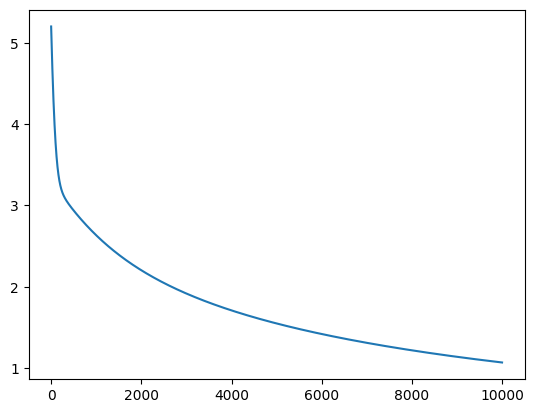

In [17]:
plt.plot(hist_loss);

In [18]:
xv = np.arange(0., 3.5, 0.1, dtype=np.float32)
yv = np.arange(0., 3.5, 0.1, dtype=np.float32)
xx, yy = np.meshgrid(xv, yv)

X_draw = xx.reshape(-1,)
Y_draw = yy.reshape(-1,)
X_test = np.c_[X_draw, Y_draw]

predicted_result = logistic_reg_output(X_test).numpy()

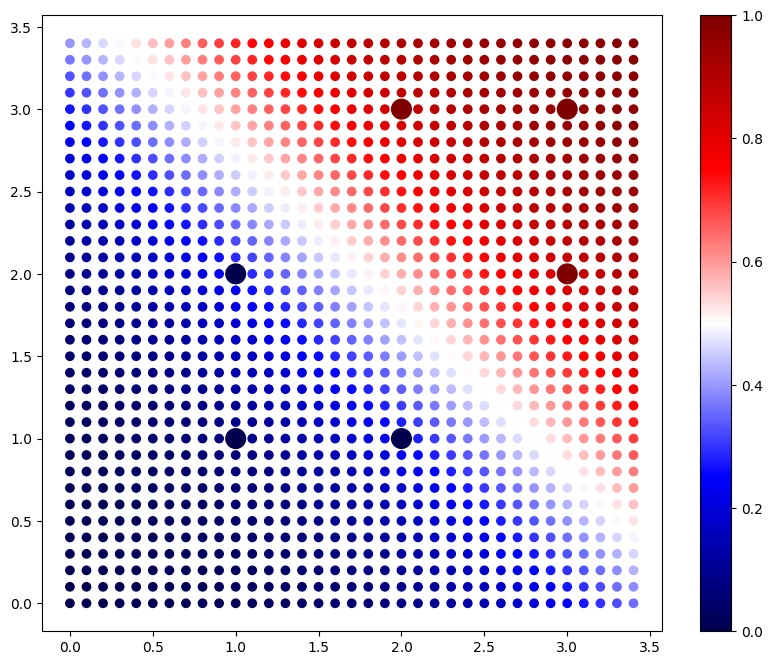

In [19]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=0., vcenter=0.5, vmax=1)

plt.figure(figsize=(10,8))
plt.scatter(X_draw, Y_draw, c=predicted_result, cmap="seismic", norm=divnorm)
plt.colorbar()
plt.scatter(X[:,0], X[:, 1], s=200, c=y, cmap="seismic", norm=divnorm)
plt.show()

In [20]:
def logistic_reg_output(X, W, b):
    z = tf.matmul(X, W) + b
    return 1 / (1 + tf.exp(-z))

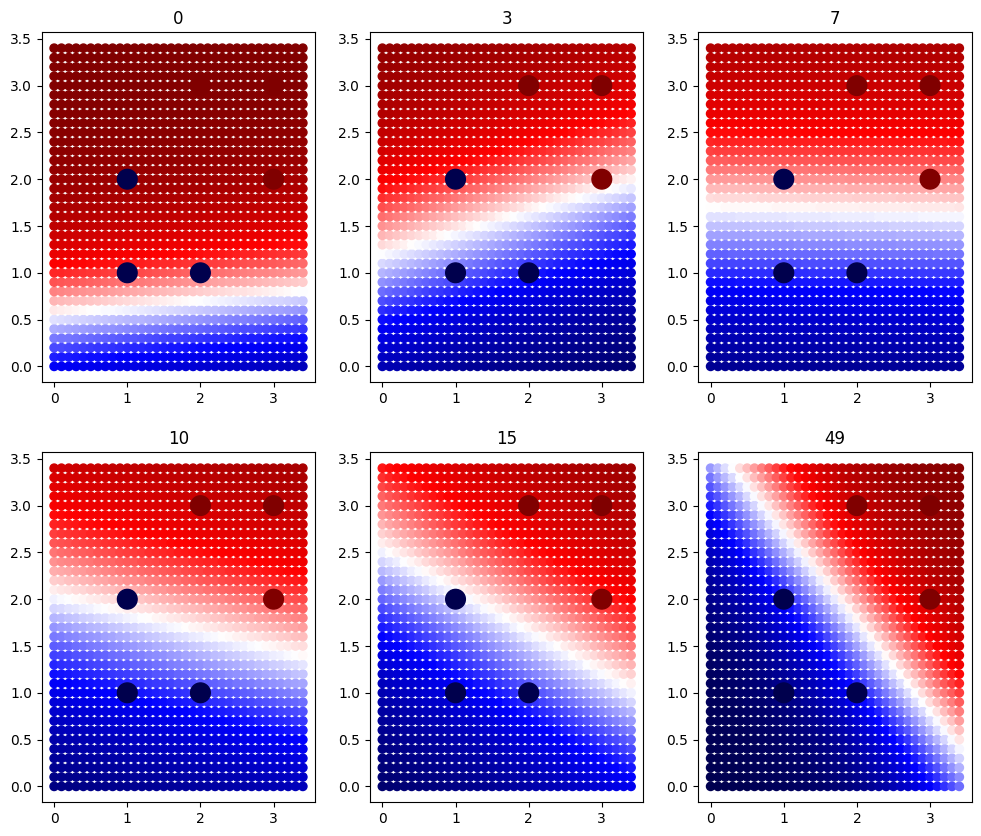

In [21]:
plt.figure(figsize=(12,10))

idx = 0
for i in [0, 3, 7, 10, 15, 49]:
    predicted_result = logistic_reg_output(X_test, hist_W[i], hist_b[i]).numpy()
    idx += 1
    plt.subplot(2,3,idx)
    plt.title(str(i))
    plt.scatter(X_draw, Y_draw, c=predicted_result, cmap="seismic", norm=divnorm)
    plt.scatter(X[:,0], X[:, 1], s=200, c=y, cmap="seismic", norm=divnorm)

plt.show()